# Laboratory 8: Parsing

# Imports

In [1]:
### CREATE VIRTUAL DISPLAY ###
!apt-get install -y xvfb # Install X Virtual Frame Buffer
import os

os.system('Xvfb :1 -screen 0 1600x1200x16  &')    # create virtual display with size 1600x1200 and 16 bit color. Color can be changed to 24 or 8
os.environ['DISPLAY']=':1.0'    # tell X clients to use our virtual DISPLAY :1.0.

%matplotlib inline

### INSTALL GHOSTSCRIPT (Required to display NLTK trees) ###
!apt install ghostscript python3-tk

from IPython.display import display

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  xvfb
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 784 kB of archives.
After this operation, 2,270 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 xvfb amd64 2:1.19.6-1ubuntu4.9 [784 kB]
Fetched 784 kB in 2s (380 kB/s)
Selecting previously unselected package xvfb.
(Reading database ... 155219 files and directories currently installed.)
Preparing to unpack .../xvfb_2%3a1.19.6-1ubuntu4.9_amd64.deb ...
Unpacking xvfb (2:1.19.6-1ubuntu4.9) ...
Setting up xvfb (2:1.19.6-1ubuntu4.9) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-tk is already the newest version (3.6.9-1~18.04).
The following additional packages will be installed:
  fonts-droid-fa

In [2]:
import nltk
from nltk import CFG, ChartParser
from nltk.corpus import stopwords

In [3]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# Functions

In [5]:
# for comparing filtered words
def get_baseline(GRAM, SENT):
  parse = ChartParser(GRAM)
  k = parse.chart_parse(SENT).edges()
  l =[]
  for x in k:
    l.append(x)
  return set(l)



# parsing with all the non-prob parsers
def parse_non_prob(GRAMMAR, SENT):
  all_parsers = {
        "ChartParser": ChartParser(GRAMMAR),
        "BottomUpParser": nltk.BottomUpChartParser(GRAMMAR),
        "BottomUpLeftCorner": nltk.BottomUpLeftCornerChartParser(GRAMMAR),
        "LeftCorner": nltk.LeftCornerChartParser(GRAMMAR)
        }
  d = dict()
  for name, parser in all_parsers.items():
    parse = parser.parse(SENT)
    #getting the trees 
    ts = []
    for x in parse:
      ts.append(x)
    
    PARSE = parser.chart_parse(SENT)
    EDGES = PARSE.num_edges()
    LIST_EDGES = []
    for x in PARSE.edges(): 
      LIST_EDGES.append(str(x))
    not_in = get_baseline(GRAMMAR, SENT) ^ set(LIST_EDGES)

    d[name] = {"Trees":(len(ts),ts),
            "Edges":EDGES,
            "List Edges":LIST_EDGES,
            "Filt Edges":not_in}
  return d

In [15]:
d = parse_non_prob(gramgram, senta)

In [12]:
# Constituency parsing
# Resulting Tree, number of edges and list of explored edges

#Chart Parser - Baseline for edge comparisson 
def get_chart_parse(grammar, sentence):
  parser = ChartParser(grammar)
  parse = parser.parse(sentence)
  ts = []
  for x in parse: 
    ts.append(x)

  PARSE = parser.chart_parse(sentence)
  EDGES = PARSE.num_edges()
  LIST_EDGES = []
  for x in PARSE.edges(): 
    LIST_EDGES.append(str(x))
  print(f"\n>>>>>>>>>>>>>>>> Chart Parser <<<<<<<<<<<<<<<<\n")
  print(f"There are {len(ts)} trees\n")
  for x in ts: 
    display(x)
  print(f"Number of edges = {EDGES}\n")
  print(f"List of Edges:\n")
  for idx,x in enumerate(LIST_EDGES):
    print(f"Edge {idx+1} : {x}")
  return LIST_EDGES

# BottomUpChartParser
def get_BUChartParser(grammar, sentence,CP=None):
  parser = nltk.BottomUpChartParser(grammar)
  parse = parser.parse(sentence)
  ts = []
  for x in parse: 
    ts.append(x)
  PARSE = parser.chart_parse(sentence)
  EDGES = PARSE.num_edges()
  LIST_EDGES = []
  for x in PARSE.edges(): 
    LIST_EDGES.append(str(x))
  print(f"\n>>>>>>>>>>>>>>>> BottomUpChartParser <<<<<<<<<<<<<<<<\n")
  print(f"There are {len(ts)} trees\n")
  for x in ts: 
    display(x)
  print(f"Number of edges = {EDGES}\n")
  print(f"List of Edges:\n")
  for idx,x in enumerate(LIST_EDGES):
    print(f"Edge {idx+1} : {x}")
  not_in = set(CP) ^ set(LIST_EDGES)
  print(f"\nWords Filtered = {len(not_in)}\n")
  for x in not_in:
    print(x)
  return LIST_EDGES

# BottomUpLeftCornerChartParser
def get_BULCChartParser(grammar, sentence,CP=None):
  parser = nltk.BottomUpLeftCornerChartParser(grammar)
  parse = parser.parse(sent)
  ts = []
  for x in parse: 
    ts.append(x)

  PARSE = parser.chart_parse(sentence)
  EDGES = PARSE.num_edges()
  LIST_EDGES = []
  for x in PARSE.edges(): 
    LIST_EDGES.append(str(x))
  print(f"\n>>>>>>>>>>>>>>>> BottomUpLeftCornerChartParser<<<<<<<<<<<<<<<<\n")
  print(f"There are {len(ts)} trees\n")
  for x in ts: 
    display(x)
  print(f"Number of edges = {EDGES}\n")
  print(f"List of Edges:\n")
  for idx,x in enumerate(LIST_EDGES):
    print(f"Edge {idx+1} : {x}")
  not_in = set(CP) ^ set(LIST_EDGES)
  print(f"\nWords Filtered = {len(not_in)}\n")
  for x in not_in:
    print(x)
  return LIST_EDGES

# LeftCornerChartParser
def get_LCCChartParser(grammar, sentence,CP=None):
  parser = nltk.LeftCornerChartParser(grammar)
  parse = parser.parse(sentence)
  ts = []
  for x in parse: 
    ts.append(x)
  PARSE = parser.chart_parse(sentence)
  EDGES = PARSE.num_edges()
  LIST_EDGES = []
  for x in PARSE.edges(): 
    LIST_EDGES.append(str(x))
  print(f"\n>>>>>>>>>>>>>>>> LeftCornerChartParser<<<<<<<<<<<<<<<<\n")
  print(f"There are {len(ts)} trees\n")
  for x in ts: 
    display(x)
  print(f"Number of edges = {EDGES}\n")
  print(f"List of Edges:\n")
  for idx,x in enumerate(LIST_EDGES):
    print(f"Edge {idx+1} : {x}")
  not_in = set(CP) ^ set(LIST_EDGES)
  print(f"\nWords Filtered = {len(not_in)}\n")
  for x in not_in:
    print(x)
  return LIST_EDGES


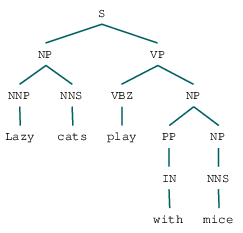

In [13]:
senta = 'Lazy cats play with mice'
senta = nltk.word_tokenize(senta)
senta_pos = nltk.pos_tag(senta)
senta_pos

# IT WORKS!
gramgram = nltk.CFG.fromstring("""

  S -> NP VP

  NP -> NNP NNS | PP NP | NNS
  
  VP -> VBZ | VBZ NP

  PP -> IN

  NNS -> "cats" | NNS

  NNS -> "mice" | NNS

  NNP -> "Lazy" | NNS

  VBZ -> "play"
  
  IN -> "with" 
  
  """)


#sent = ['small', 'cats', 'and', 'mice']
sent = ["Lazy","cats","play","with","mice"]
parser = ChartParser(gramgram)
parse = parser.parse(sent)
ts = []
for x in parse: 
  ts.append(x)
ts[0]


>>>>>>>>>>>>>>>> Chart Parser <<<<<<<<<<<<<<<<

There are 4 trees



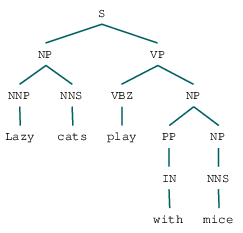

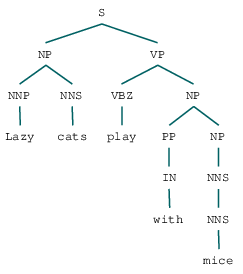

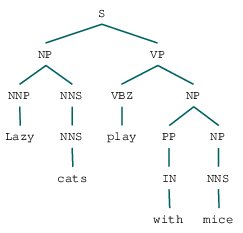

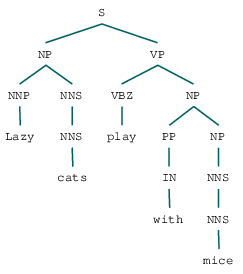

Number of edges = 34

List of Edges:

Edge 1 : [0:1] 'Lazy'
Edge 2 : [1:2] 'cats'
Edge 3 : [2:3] 'play'
Edge 4 : [3:4] 'with'
Edge 5 : [4:5] 'mice'
Edge 6 : [0:1] NNP -> 'Lazy' *
Edge 7 : [0:1] NP -> NNP * NNS
Edge 8 : [1:2] NNS -> 'cats' *
Edge 9 : [1:2] NP -> NNS *
Edge 10 : [1:2] NNS -> NNS *
Edge 11 : [1:2] NNP -> NNS *
Edge 12 : [0:2] NP -> NNP NNS *
Edge 13 : [0:2] S  -> NP * VP
Edge 14 : [1:2] NP -> NNP * NNS
Edge 15 : [1:2] S  -> NP * VP
Edge 16 : [2:3] VBZ -> 'play' *
Edge 17 : [2:3] VP -> VBZ *
Edge 18 : [2:3] VP -> VBZ * NP
Edge 19 : [0:3] S  -> NP VP *
Edge 20 : [1:3] S  -> NP VP *
Edge 21 : [3:4] IN -> 'with' *
Edge 22 : [3:4] PP -> IN *
Edge 23 : [3:4] NP -> PP * NP
Edge 24 : [4:5] NNS -> 'mice' *
Edge 25 : [4:5] NP -> NNS *
Edge 26 : [4:5] NNS -> NNS *
Edge 27 : [4:5] NNP -> NNS *
Edge 28 : [4:5] NP -> NNP * NNS
Edge 29 : [4:5] S  -> NP * VP
Edge 30 : [3:5] NP -> PP NP *
Edge 31 : [3:5] S  -> NP * VP
Edge 32 : [2:5] VP -> VBZ NP *
Edge 33 : [0:5] S  -> NP VP *
Edge 34 : 

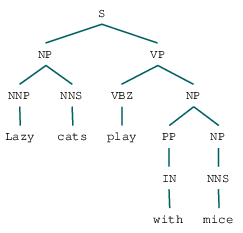

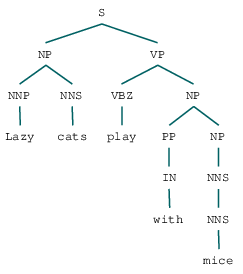

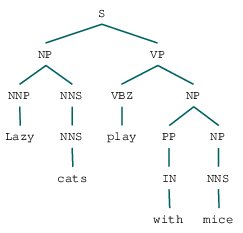

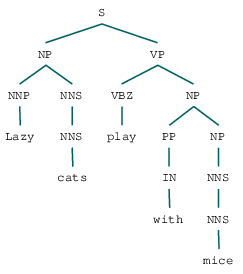

Number of edges = 56

List of Edges:

Edge 1 : [0:1] 'Lazy'
Edge 2 : [1:2] 'cats'
Edge 3 : [2:3] 'play'
Edge 4 : [3:4] 'with'
Edge 5 : [4:5] 'mice'
Edge 6 : [0:0] NNP -> * 'Lazy'
Edge 7 : [0:1] NNP -> 'Lazy' *
Edge 8 : [0:0] NP -> * NNP NNS
Edge 9 : [0:1] NP -> NNP * NNS
Edge 10 : [1:1] NNS -> * 'cats'
Edge 11 : [1:2] NNS -> 'cats' *
Edge 12 : [1:1] NP -> * NNS
Edge 13 : [1:1] NNS -> * NNS
Edge 14 : [1:1] NNP -> * NNS
Edge 15 : [0:2] NP -> NNP NNS *
Edge 16 : [1:2] NP -> NNS *
Edge 17 : [1:2] NNS -> NNS *
Edge 18 : [1:2] NNP -> NNS *
Edge 19 : [1:1] NP -> * NNP NNS
Edge 20 : [1:2] NP -> NNP * NNS
Edge 21 : [1:1] S  -> * NP VP
Edge 22 : [1:2] S  -> NP * VP
Edge 23 : [0:0] S  -> * NP VP
Edge 24 : [0:2] S  -> NP * VP
Edge 25 : [2:2] VBZ -> * 'play'
Edge 26 : [2:3] VBZ -> 'play' *
Edge 27 : [2:2] VP -> * VBZ
Edge 28 : [2:2] VP -> * VBZ NP
Edge 29 : [2:3] VP -> VBZ *
Edge 30 : [2:3] VP -> VBZ * NP
Edge 31 : [1:3] S  -> NP VP *
Edge 32 : [0:3] S  -> NP VP *
Edge 33 : [3:3] IN -> * 'with'
Edg

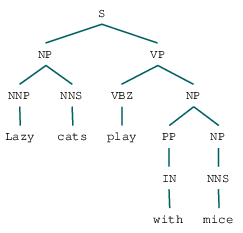

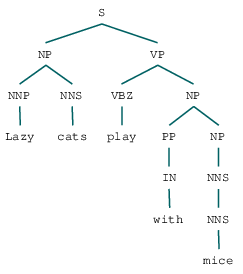

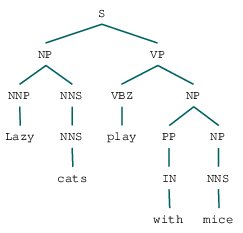

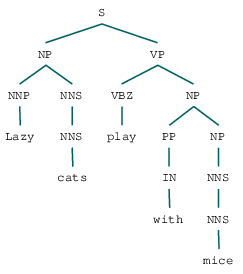

Number of edges = 34

List of Edges:

Edge 1 : [0:1] 'Lazy'
Edge 2 : [1:2] 'cats'
Edge 3 : [2:3] 'play'
Edge 4 : [3:4] 'with'
Edge 5 : [4:5] 'mice'
Edge 6 : [0:1] NNP -> 'Lazy' *
Edge 7 : [0:1] NP -> NNP * NNS
Edge 8 : [1:2] NNS -> 'cats' *
Edge 9 : [1:2] NP -> NNS *
Edge 10 : [1:2] NNS -> NNS *
Edge 11 : [1:2] NNP -> NNS *
Edge 12 : [0:2] NP -> NNP NNS *
Edge 13 : [0:2] S  -> NP * VP
Edge 14 : [1:2] NP -> NNP * NNS
Edge 15 : [1:2] S  -> NP * VP
Edge 16 : [2:3] VBZ -> 'play' *
Edge 17 : [2:3] VP -> VBZ *
Edge 18 : [2:3] VP -> VBZ * NP
Edge 19 : [0:3] S  -> NP VP *
Edge 20 : [1:3] S  -> NP VP *
Edge 21 : [3:4] IN -> 'with' *
Edge 22 : [3:4] PP -> IN *
Edge 23 : [3:4] NP -> PP * NP
Edge 24 : [4:5] NNS -> 'mice' *
Edge 25 : [4:5] NP -> NNS *
Edge 26 : [4:5] NNS -> NNS *
Edge 27 : [4:5] NNP -> NNS *
Edge 28 : [4:5] NP -> NNP * NNS
Edge 29 : [4:5] S  -> NP * VP
Edge 30 : [3:5] NP -> PP NP *
Edge 31 : [3:5] S  -> NP * VP
Edge 32 : [2:5] VP -> VBZ NP *
Edge 33 : [0:5] S  -> NP VP *
Edge 34 : 

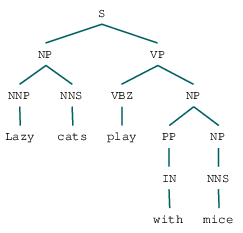

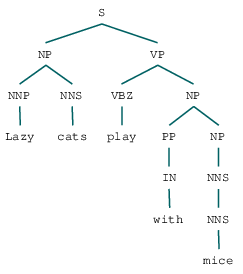

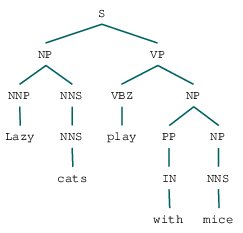

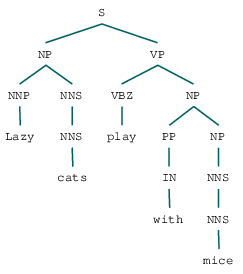

Number of edges = 30

List of Edges:

Edge 1 : [0:1] 'Lazy'
Edge 2 : [1:2] 'cats'
Edge 3 : [2:3] 'play'
Edge 4 : [3:4] 'with'
Edge 5 : [4:5] 'mice'
Edge 6 : [0:1] NNP -> 'Lazy' *
Edge 7 : [0:1] NP -> NNP * NNS
Edge 8 : [1:2] NNS -> 'cats' *
Edge 9 : [1:2] NP -> NNS *
Edge 10 : [1:2] NNS -> NNS *
Edge 11 : [1:2] NNP -> NNS *
Edge 12 : [0:2] NP -> NNP NNS *
Edge 13 : [0:2] S  -> NP * VP
Edge 14 : [1:2] S  -> NP * VP
Edge 15 : [2:3] VBZ -> 'play' *
Edge 16 : [2:3] VP -> VBZ *
Edge 17 : [2:3] VP -> VBZ * NP
Edge 18 : [0:3] S  -> NP VP *
Edge 19 : [1:3] S  -> NP VP *
Edge 20 : [3:4] IN -> 'with' *
Edge 21 : [3:4] PP -> IN *
Edge 22 : [3:4] NP -> PP * NP
Edge 23 : [4:5] NNS -> 'mice' *
Edge 24 : [4:5] NP -> NNS *
Edge 25 : [4:5] NNS -> NNS *
Edge 26 : [4:5] NNP -> NNS *
Edge 27 : [3:5] NP -> PP NP *
Edge 28 : [2:5] VP -> VBZ NP *
Edge 29 : [0:5] S  -> NP VP *
Edge 30 : [1:5] S  -> NP VP *

Words Filtered = 4

[4:5] NP -> NNP * NNS
[4:5] S  -> NP * VP
[1:2] NP -> NNP * NNS
[3:5] S  -> NP * VP

In [14]:
L_CP = get_chart_parse(gramgram, sent)
L_BU = get_BUChartParser(gramgram, sent,CP=L_CP)
L_BUL = get_BULCChartParser(gramgram,sent,CP=L_CP)
L_LCC = get_LCCChartParser(gramgram, sent,CP=L_CP)

# Report 

## Evaluation 
We see that for the different parsing trees there are different number of edges as well as in some words being filtered out. When comparing the ChartParser to the BottomUpChartParser, BottomUpLeftCornerChartParser, and LeftCornerChartParser, we see that in LeftCornerChartParser, and BottomUpChartParser filter out the most words whilst BottomUpLeftCornerChartParser does not filter any of the words out. 

Additionally, if we look at performance we have to ..... 

- define performance in this context 
- say why it does well 

## Conclusion 
